# Photometric Stereo Hands On

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from pathlib import Path
import PIL
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm

In [65]:
from photometric_stereo import *
from photometric_stereo_utils import *

## 1.1 Estimating Albedo and Surface Normal
Let us start with the grayscale sphere model, which is located in the `SphereGray5` folder. The folder contains 5 images of a sphere with grayscale checker texture under similar lighting conditions with the one in the book. Your task is to estimate the surface reflectance (albedo) and surface normal of this model. The light source directions are encoded in the image file names.

In [4]:
# setting image directory to the SphereGray5

image_dir = '../photometrics_images/SphereGray5'

In [5]:
# loading grayscale images and light source directions from the image directory
# image_stack dimentions: height, width, number_of_images, number_of_channels
# scriptV dimentions: number_of_images, 3, number_of_channels

image_stack, scriptV = load_syn_images(image_dir, channels=(0,))

loading images...finished!
number of images:   5
image size:         (512, 512)
number of channels: 1
elapsed time: 0.51 s


In [6]:
# printing input data dimensions

h, w, n, n_ch = image_stack.shape

print(f'images height: {h:>14}', f'\nimages width: {w:>15}')
print(f'number of images:{n:>10}', f'\nnumber of channels: {n_ch:>7}')
print('-'*40)
print(f'image_stack dimensions: ', image_stack.shape)
print(f'scriptV dimensions:     ', scriptV.shape)

images height:            512 
images width:             512
number of images:         5 
number of channels:       1
----------------------------------------
image_stack dimensions:  (512, 512, 5, 1)
scriptV dimensions:      (5, 3)


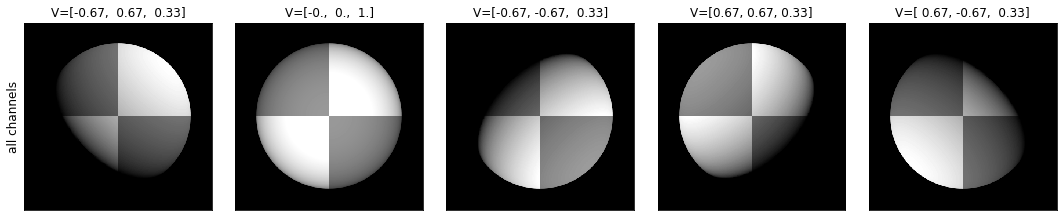

In [7]:
# displying some randomly sampled images

show_samples(image_stack, scriptV, n_samples=5, fig_size=3)

### Question - 1
1. Complete the code in `estimate_alb_norm` to estimate albedo and surface normal map for the `SphereGray5` folder. What do you expect to see in albedo image and how is it different with your result?

$\color{blue}{\textit Answer:}$
_Just based on visual observations of the sample images, two distinct albedo values are expected. This seems almost true in the estimated albedo image, but if we look more carefully, as we move from the center towards the periphery, the albedo values in all four partitions decreases. The albedo histogram is consistent with our visual examination. Another, noticeable point from the histogram is that albedo in some points is larger than one. If our assumption is true that the sphere's surface is Lambertian with just two albedo values, since we have considered the global shadow effect using the shadow trick, the errors in the estimated albedo could be resulted from incorrect source modeling, e.g. distance point source assumption._

In [8]:
# computing albedo and normals with shadow-trick

albedo, normals, _ = estimate_alb_norm(image_stack, scriptV, shadow_trick=True)

computing albedo and normals with shadow trick...finished!
elapsed time: 56.82 s


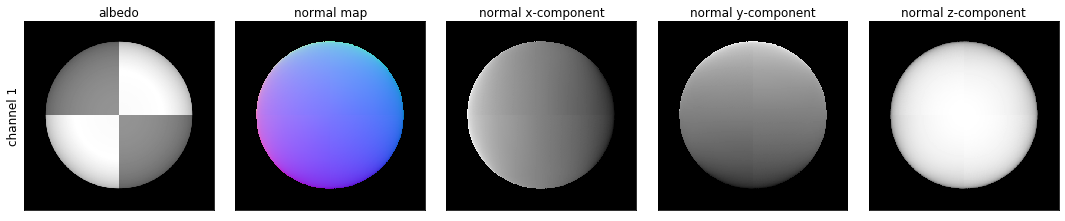

In [9]:
show_results(albedo, normals, fig_size=3)

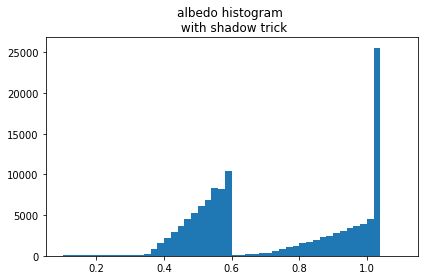

In [13]:
# displaying the histogram of the albedo image 

n_bins = 50

fig, ax = plt.subplots(1, 1, sharey=True, tight_layout=True)

ax.hist(albedo.flatten(), bins=n_bins, range=(0.1, 1.1));
ax.set(title = 'albedo histogram \n (shadow trick ON)');


2. In principle, what is the minimum number of images you need to estimate albedo and surface normal? Run the algorithm with more images by using `SphereGray25` and observe the differences in the results. You could try all images at once or a few at the time, in an incremental fashion. Choose a strategy and justify it by discussing your results.

$\color{blue}{\textit Answer:}$
_Based on the Lambertian reflectance model, there are 3 unknowns at each point (2 for normal direction and 1 for albedo value), so in principle, 3 linearly independent source directions (illumination matrix with rank 3) at each point is required for the model to have a unique solution. However, because of the casted shadows in some points, more samples are required for all the pixels. 
In practice, due to the inaccuracies in the source and shadow model, using more samples reduces the effect of noise and outliers._

In [33]:
# setting image directory to SphereGray25 and loading images

image_dir = '../photometrics_images/SphereGray25'
image_stack, scriptV = load_syn_images(image_dir, channels=(0,))

loading images...finished!
number of images:   25
image size:         (512, 512)
number of channels: 1
elapsed time: 0.72 s


computing albedo and normals with shadow trick...finished!
elapsed time: 57.81 s
computing albedo and normals with shadow trick...finished!
elapsed time: 57.41 s
computing albedo and normals with shadow trick...finished!
elapsed time: 54.86 s
computing albedo and normals with shadow trick...finished!
elapsed time: 59.04 s


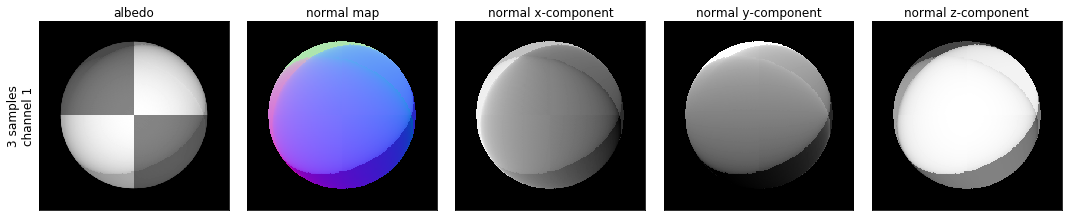

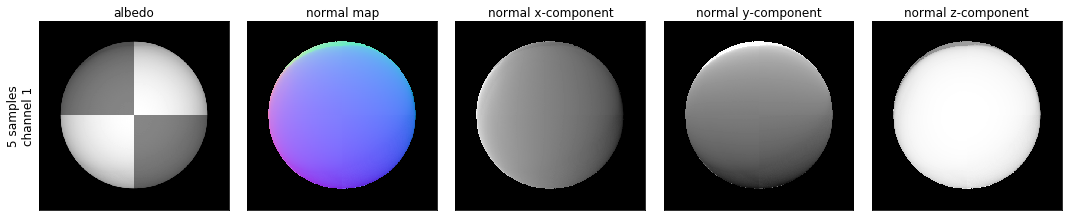

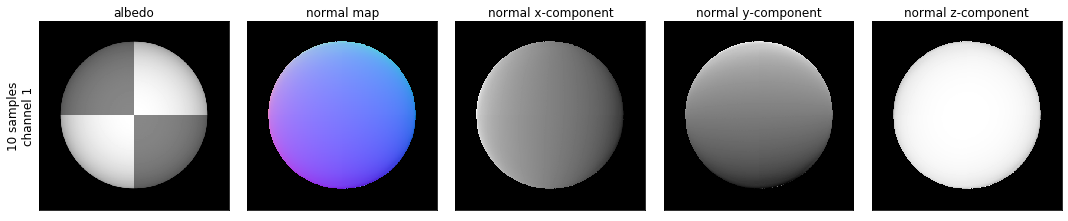

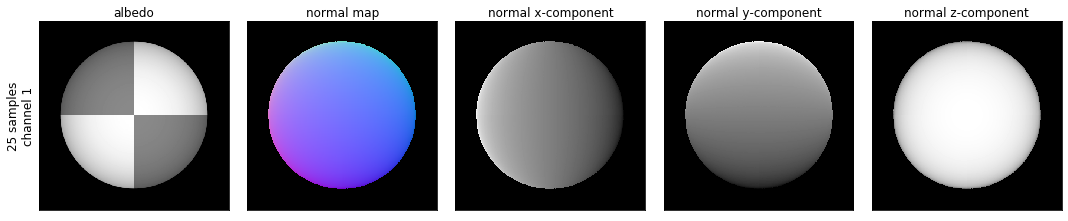

In [34]:
# displaying the albedo and normals computed with 3, 5, 10 and 25 sample.

albedo, normals, _ = estimate_alb_norm(image_stack[:, :, :3, :], scriptV[:3, :], shadow_trick=True)
show_results(albedo, normals, fig_size=3, ylabel='3 samples')

albedo, normals, _ = estimate_alb_norm(image_stack[:, :, :5, :], scriptV[:5, :], shadow_trick=True)
show_results(albedo, normals, fig_size=3, ylabel='5 samples')

albedo, normals, _ = estimate_alb_norm(image_stack[:, :, :10, :], scriptV[:10, :], shadow_trick=True)
show_results(albedo, normals, fig_size=3, ylabel='10 samples')

albedo, normals, _ = estimate_alb_norm(image_stack[:, :, :25, :], scriptV[:25, :], shadow_trick=True)
show_results(albedo, normals, fig_size=3, ylabel='25 samples')

3. What is the impact of shadows in photometric stereo? Explain the trick that is used in the text to deal with shadows. Remove that trick and check your results. Is the trick necessary in the case of 5 images, how about 25 images?

$\color{blue}{\textit Answer:}$
_Local shading models, as we used in here, dismiss the effect of shadows and inter-reflections. In this case, since the sphere's surface is convex, there are no inter-reflections. However, if we use the same illumination vector for all the points on the surface the casted shadows lead to error in albedo and normal estimation. The shadow trick takes into account the effect of shadow by zeroing the illumination at points with zero brightness. This trick is necessary when the number of samples is small (e.g. 5 images), however, if the number of samples is large (e.g. 25), the shadowed samples become outliers and their effect becomes negligible. Therefore, it could be computationally more efficient if we remove the trick when the number of samples is large, because without the shadow trick the illumination matrix will be the same at all points._

computing albedo and normals without shadow trick...finished!
elapsed time: 0.35 s
computing albedo and normals with shadow trick...finished!
elapsed time: 56.16 s
computing albedo and normals without shadow trick...finished!
elapsed time: 0.52 s
computing albedo and normals with shadow trick...finished!
elapsed time: 63.17 s


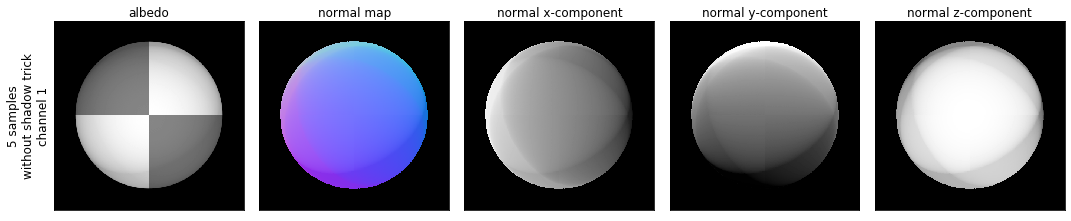

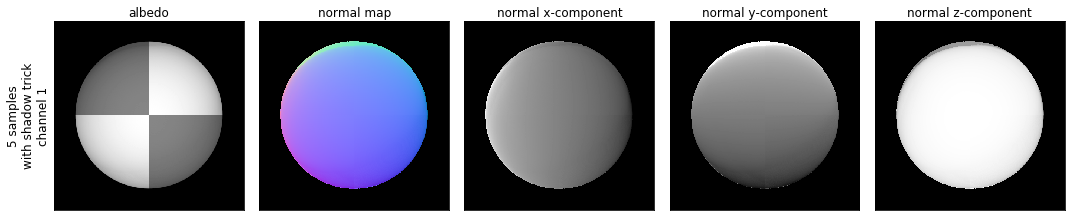

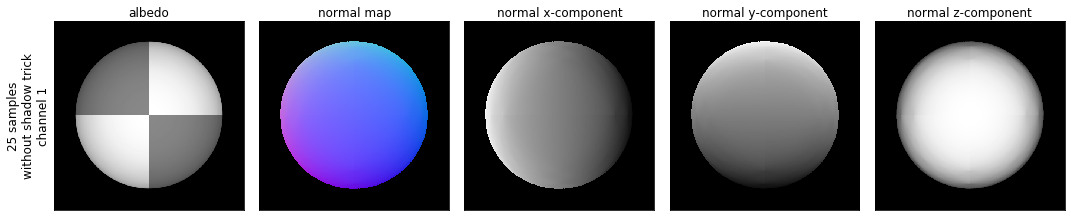

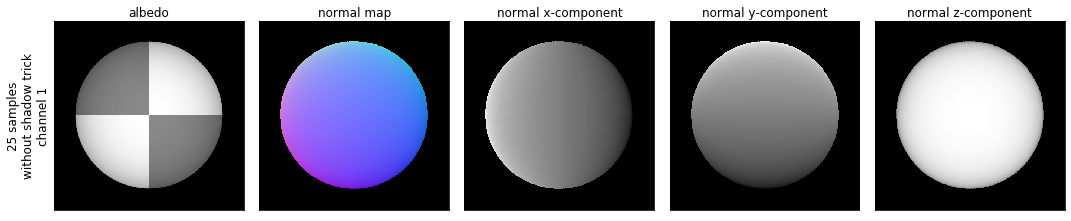

In [35]:
# computing albedo and normals with and without shadow trick for 5 samples
image_stack5, scriptV5 = image_stack[:, :, :5, :], scriptV[:5, :]
albedo5, normals5, res5 = estimate_alb_norm(image_stack5, scriptV5, shadow_trick=False)
albedo5_st, normals5_st, res5_st = estimate_alb_norm(image_stack5, scriptV5, shadow_trick=True)

# computing albedo and normals with and without shadow trick for all (25) samples
albedo, normals, res = estimate_alb_norm(image_stack, scriptV, shadow_trick=False)
albedo_st, normals_st, res_st = estimate_alb_norm(image_stack, scriptV, shadow_trick=True)

# displaying the results for 5 samples
show_results(albedo5, normals5, fig_size=3, ylabel='5 samples\nwithout shadow trick')
show_results(albedo5_st, normals5_st, fig_size=3, ylabel='5 samples\nwith shadow trick')

# displaying the results for 25 samples
show_results(albedo, normals, fig_size=3, ylabel='25 samples\nwithout shadow trick')
show_results(albedo_st, normals_st, fig_size=3, ylabel='25 samples\nwithout shadow trick')

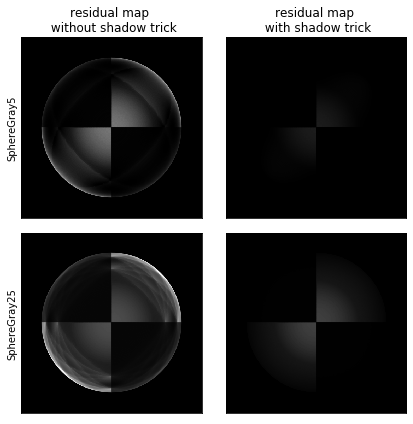

In [22]:
# comparing the residual map of the least square error estimation between 5 and 25 samples.

max_res = max(np.max(res5), np.max(res5_st), 
              np.max(res25/5), np.max(res25_st/25))

fig, axes = plt.subplots(2, 2, figsize=(6, 6), tight_layout=True)

for axs in axes:
    for ax in axs:
        ax.set(xticks=[], yticks=[])

axes[0, 0].imshow(res5.squeeze(), cmap='gray', vmax=max_res)
axes[0, 1].imshow(res5_st.squeeze(), cmap='gray', vmax=max_res)
axes[1, 0].imshow(res25.squeeze()/5, cmap='gray', vmax=max_res)
axes[1, 1].imshow(res25_st.squeeze()/5, cmap='gray', vmax=max_res)

axes[0, 0].set_title('residual map \n without shadow trick')
axes[0, 1].set_title('residual map \n with shadow trick')
axes[0, 0].set_ylabel('5 samples')
axes[1, 0].set_ylabel('25 samples');


## 1.2 Test of Integrability
Before we can reconstruct the surface height map, it is required to compute the partial derivatives $\frac{\partial f}{\partial x}$ and $\frac{\partial f}{\partial y}$ (or p and q in the algorithm). The partial derivatives also give us a chance to double check our computation, namely the test of ${\textit integrability}$.

### Question 2
1. Compute the partial derivatives (p and q in the algorithm) by filling in your code into `check_integrability`.
2. Implement and compute the second derivatives according to the algorithm and perform the test of integrability by choosing a reasonable threshold. What could be the reasons for the errors? How does the test perform with different number of images used in the reconstruction process in Question-1?

$\color{blue}{\textit Answer:}$
_Most of the errors happen on the borders of the object where the normal vector suddenly becomes zero (or NaN, based on the implementation). Also, a small portion of the errors happen on the border between different albedo partitions._

_The exact answer depends on how we treat the zero pixels and/or how we compute the gradients, but, in general, as the number of samples increases and the normal estimates become more accurate, the number of outliers slightly decreases._

threshold:  0.005
----------------------------------------
number of outliers in channel 1:  1661
percentage of outliers in channel 1:  0.6%
----------------------------------------
elapsed time: 0.05 s


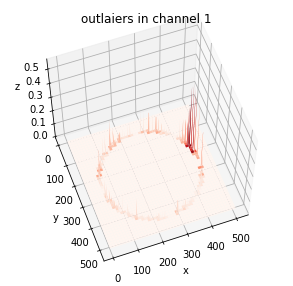

In [86]:
# integrability check for 5-samples estimation

p5, q5, SE5 = check_integrability(normals5, threshold = 0.005, nan_to_zero=True)
SE5 = np.nan_to_num(SE5)

show_outlaiers(SE5)

threshold:  0.005
----------------------------------------
number of outliers in channel 1:  1614
percentage of outliers in channel 1:  0.6%
----------------------------------------
elapsed time: 0.07 s


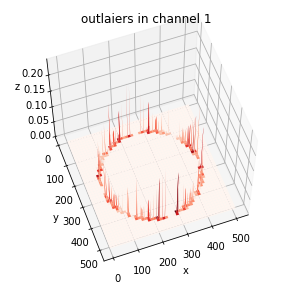

In [87]:
# integrability check for 25-samples estimation

p, q, SE = check_integrability(normals, nan_to_zero=True)
SE = np.nan_to_num(SE)

show_outlaiers(SE)

## 1.3 Shape by Integration 
To reconstruct the surface height map, we need to continuously integrate the partial derivatives over a path. However, as we are working with discrete structures, you will be simply summing their values. 
The algorithm in the chapter presents a way to do the integration in ${\textit column-major}$ order, that is you start at the top-left corner and integrate along the first column, then go towards right along each row. Yet, it is also noticed that it would be better to use many different paths and average so as to spread around the errors in the derivative estimates.

### Question - 3
1. Construct the surface height map using column-major order as described in the algorithm, then implement row-major path integration. Your code
should now go to `construct_surface`. What are the differences in the results of the two paths?

$\color{blue}{\textit Answer:}$
\
_Sudden changes in the estimated normal map resulted from zero pixels, albedo changes and model inaccuracies creates sudden jumps in the integral which results in accumulated errors along rows or columns._

_The column-major integration is sensitive to edges along the row axis and therefore, errors accumulate along the rows._

_The row-major integration is sensitive to edges along the column axis and therefore, errors accumulate along the columns._

In [ ]:
# uncomment this line for inline display mode
%matplotlib inline

# uncomment these lines for interactive display mode
#plt.close('all')
#%matplotlib

integration in column-major order...
elapsed time: 0.02 s
integration in row-major order...
elapsed time: 0.02 s
integration in column-major order...
elapsed time: 0.01 s
integration in row-major order...
elapsed time: 0.01 s
averaging...
elapsed time: 0.02 s


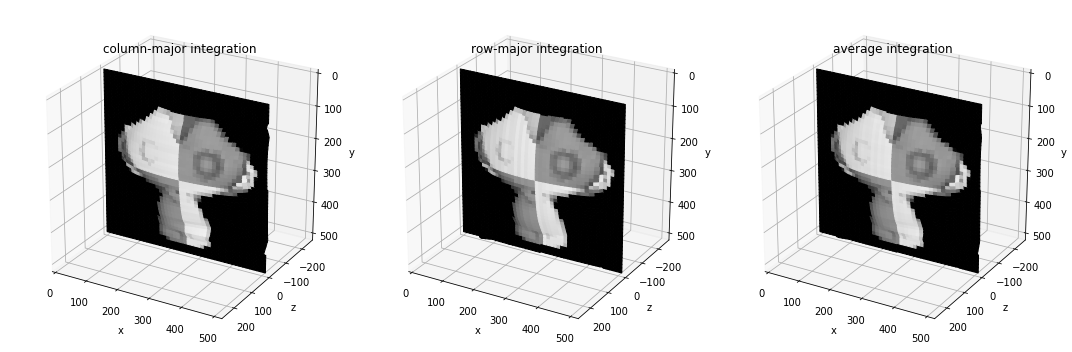

In [117]:
# surface construction using 5-samples estimation

fig_size = 5
fig = plt.figure(figsize=(fig_size*3, fig_size), tight_layout=True);

height_map_col = construct_surface(p5, q5, path_type='column')

ax = fig.add_subplot(1, 3, 1, projection='3d');
show_model(height_map_col, albedo, fig_size=5, axes=ax);
ax.set(title = 'column-major integration');

height_map_col = construct_surface(p5, q5, path_type='row')

ax = fig.add_subplot(1, 3, 2, projection='3d');
show_model(height_map_col, albedo, fig_size=5, axes=ax);
ax.set(title = 'row-major integration');

height_map_col = construct_surface(p5, q5, path_type='average')

ax = fig.add_subplot(1, 3, 3, projection='3d');
show_model(height_map_col, albedo, fig_size=5, axes=ax);
ax.set(title = 'average integration');


integration in column-major order...
elapsed time: 0.02 s
integration in row-major order...
elapsed time: 0.01 s
integration in column-major order...
elapsed time: 0.01 s
integration in row-major order...
elapsed time: 0.01 s
averaging...
elapsed time: 0.02 s


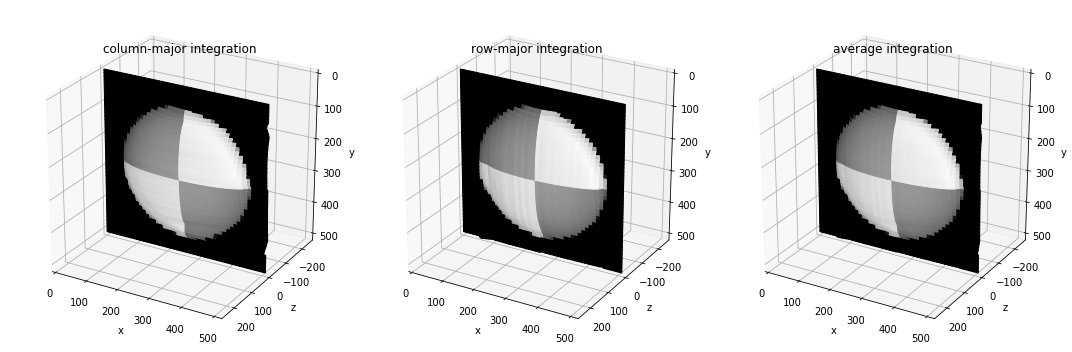

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [78]:
# surface construction using 25-samples estimation

fig_size = 5
fig = plt.figure(figsize=(fig_size*3, fig_size), tight_layout=True);

height_map_col = construct_surface(p, q, path_type='column')

ax = fig.add_subplot(1, 3, 1, projection='3d');
show_model(height_map_col, albedo, fig_size=5, axes=ax);
ax.set(title = 'column-major integration');

print('-'*40)

height_map_row = construct_surface(p, q, path_type='row')

ax = fig.add_subplot(1, 3, 2, projection='3d');
show_model(height_map_row, albedo, fig_size=5, axes=ax);
ax.set(title = 'row-major integration');

print('-'*40)

height_map = construct_surface(p, q, path_type='average')

ax = fig.add_subplot(1, 3, 3, projection='3d');
show_model(height_map, albedo, fig_size=5, axes=ax);
ax.set(title = 'average integration');


2. Now, take the average of the results. Do you see any improvement compared to when using only one path? Are the construction results different with different number of images being used?

$\color{blue}{\textit Answer:}$
_The averaging compensates for the errors along the row and/or column. In general, more number of images lead to more accurate estimation of the surface normal, which in turn increases the accuracy of the surface construction.However, in the case of sphere, the difference between surfaces constructed using 5 and 25 samples is negligible._

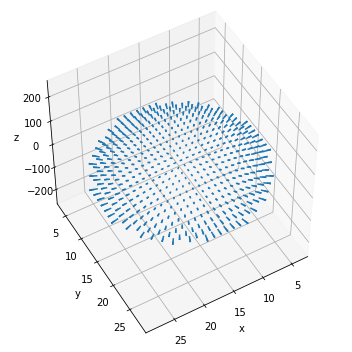

In [90]:
#displaying the quiver plot of the surface normals

show_normals(normals, height_map, sampling_step=16, fig_size=5, elev=50, azim=60)

In [103]:
# free up some memory 

del image_stack, scriptV

## 1.4 Experiments with different objects
In this part, you will try to run the photometric stereo algorithm in various number of scenarios to see how well it can be generalized.

### Question - 4
Run the algorithm and show the results for the `MonkeyGray` model. The albedo results of the monkey may comprise more albedo errors than in case of the sphere. Observe and describe the errors. What could be the reason for those errors? You may want to experiment with different number of images as you did in Question-1 to see the effects. How do you think that could help solving these errors?

$\color{blue}{\textit Answer:}$
_Ideally, we expect the albedo result for the MonkeyGray model to be binary (to albedo values) without observable edges in each partition. But as shown in thefollwing, the albedo result covers a wide range of values. This happens because in addition to the cast shadow as we had in the sphere example, the non-convex surface of the MonkeyGray model also creates attached shadows and inter-reflections that have not been considered by our simple and local shading model._

loading images...finished!
number of images:   121
image size:         (512, 512)
number of channels: 1
elapsed time: 3.97 s


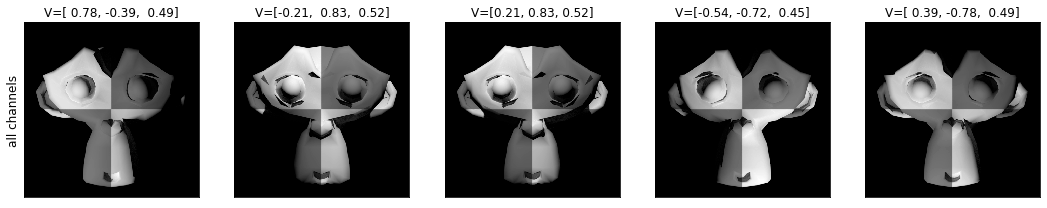

In [105]:
# loading images and displaying some samples

image_dir = '../photometrics_images/MonkeyGray'
image_stack, scriptV = load_syn_images(image_dir, channels=(0,))
show_samples(image_stack, scriptV, n_samples=5, fig_size=3)

computing albedo and normals without shadow trick...finished!
elapsed time: 1.44 s


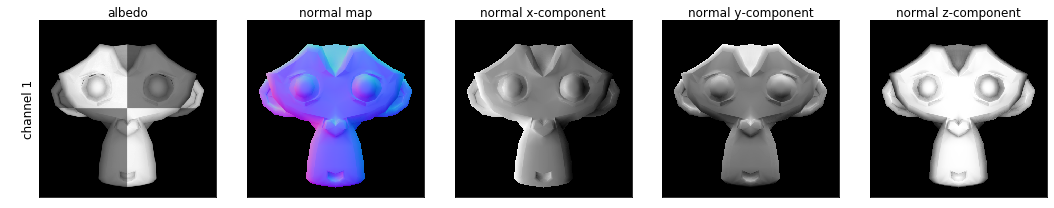

In [110]:
# computing and displaying albedo and normals 

albedo, normals, _ = estimate_alb_norm(image_stack, scriptV)
show_results(albedo, normals, fig_size=3)

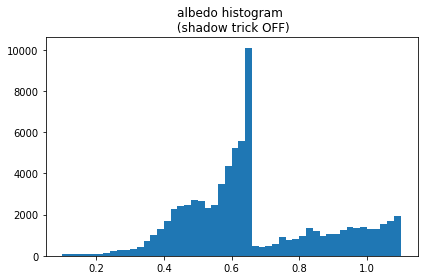

In [116]:
# displaing histogram of the albedo image

n_bins = 50

fig, ax = plt.subplots(1, 1, sharey=True, tight_layout=True)

ax.hist(albedo.flatten(), bins=n_bins, range=(0.1, 1.1));
ax.set(title = 'albedo histogram \n (shadow trick OFF)');

In [111]:
# checking integrability

p, q, SE = check_integrability(normals, nan_to_zero=True)
SE = np.nan_to_num(SE)

threshold:  0.005
----------------------------------------
number of outliers in channel 1:  3626
percentage of outliers in channel 1:  1.4%
----------------------------------------
elapsed time: 0.08 s


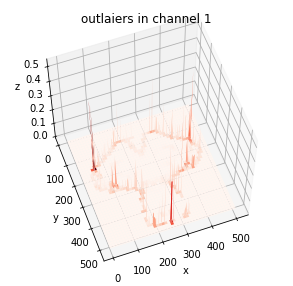

In [113]:
show_outlaiers(SE)

In [ ]:
# uncomment this line for inline display mode
%matplotlib inline

# uncomment these lines for interactive display mode
#plt.close('all')
#%matplotlib

integration in column-major order...
elapsed time: 0.01 s
integration in row-major order...
elapsed time: 0.02 s
integration in column-major order...
elapsed time: 0.01 s
integration in row-major order...
elapsed time: 0.01 s
averaging...
elapsed time: 0.02 s


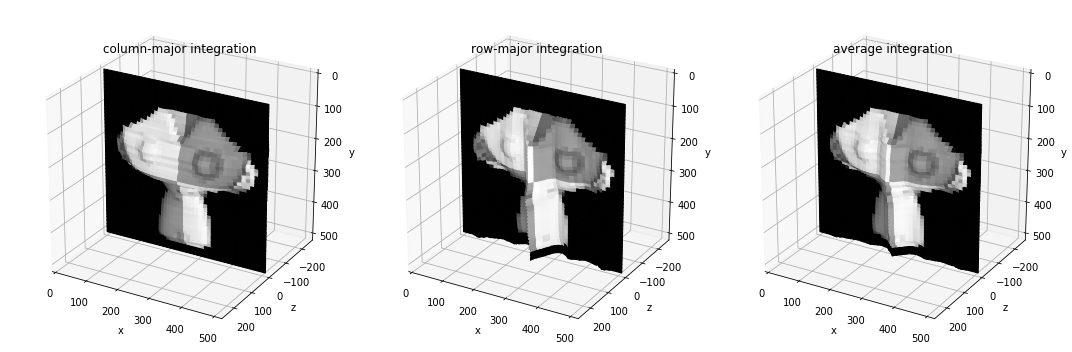

In [114]:
# constructing the surface

fig_size = 5
fig = plt.figure(figsize=(fig_size*3, fig_size), tight_layout=True);

height_map_col = construct_surface(p, q, path_type='column')

ax = fig.add_subplot(1, 3, 1, projection='3d');
show_model(height_map_col, albedo, fig_size=5, axes=ax);
ax.set(title = 'column-major integration');

print('-'*40)

height_map_row = construct_surface(p, q, path_type='row')

ax = fig.add_subplot(1, 3, 2, projection='3d');
show_model(height_map_row, albedo, fig_size=5, axes=ax);
ax.set(title = 'row-major integration');

print('-'*40)

height_map = construct_surface(p, q, path_type='average')

ax = fig.add_subplot(1, 3, 3, projection='3d');
show_model(height_map, albedo, fig_size=5, axes=ax);
ax.set(title = 'average integration');


In [138]:
# free up some memory

del image_stack, scriptV

### Question - 5
Update the implementation to work for 3-channel **RGB** inputs and test it with 2 models `SphereColor` and `MonkeyColor`. Explain your changes and show your results. Observe the problem in the constructed surface normal map and height map, explain why a zero pixel could be a problem and propose a way to overcome that.

$\color{blue}{\textit Answer:}$
_We compute the albedo and the normal for each channel. For zero pixels in each channel we cannot estimate the normal.If the number of zero pixels is significant, as it is the case for the blue channel of the SphereColor, it creates large errors in the height map due to the discontinuities in the normal map. One way to overcome the zero pixel problem and improve the height map estimate, is to average the values of channels at each pixel and then compute the surface norml and height map for the new gray image._

loading images...finished!
number of images:   25
image size:         (512, 512)
number of channels: 3
elapsed time: 1.09 s


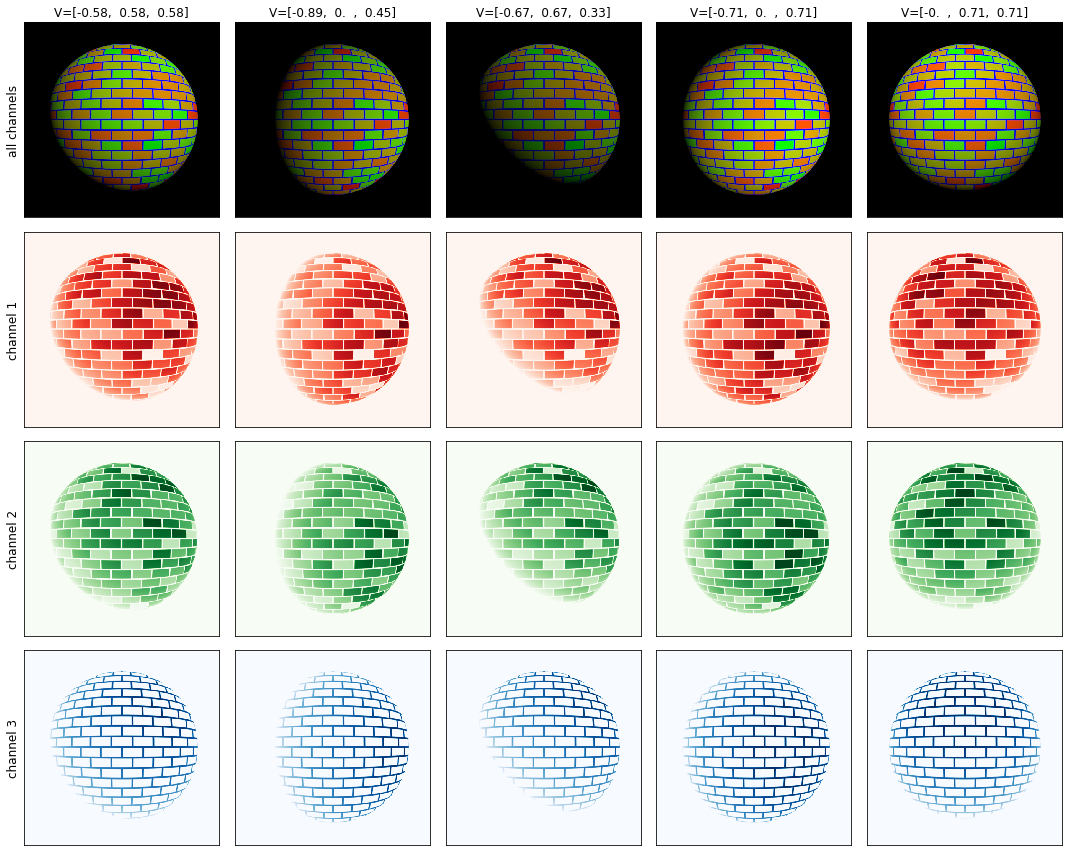

In [139]:
# loading three channels of color images and displaying some samples

image_dir = '../photometrics_images/SphereColor'
image_stack, scriptV = load_syn_images(image_dir, channels=(0, 1, 2))
show_samples(image_stack, scriptV, n_samples=5, fig_size=3, show_channels=True)

computing albedo and normals without shadow trick...finished!
elapsed time: 2.64 s


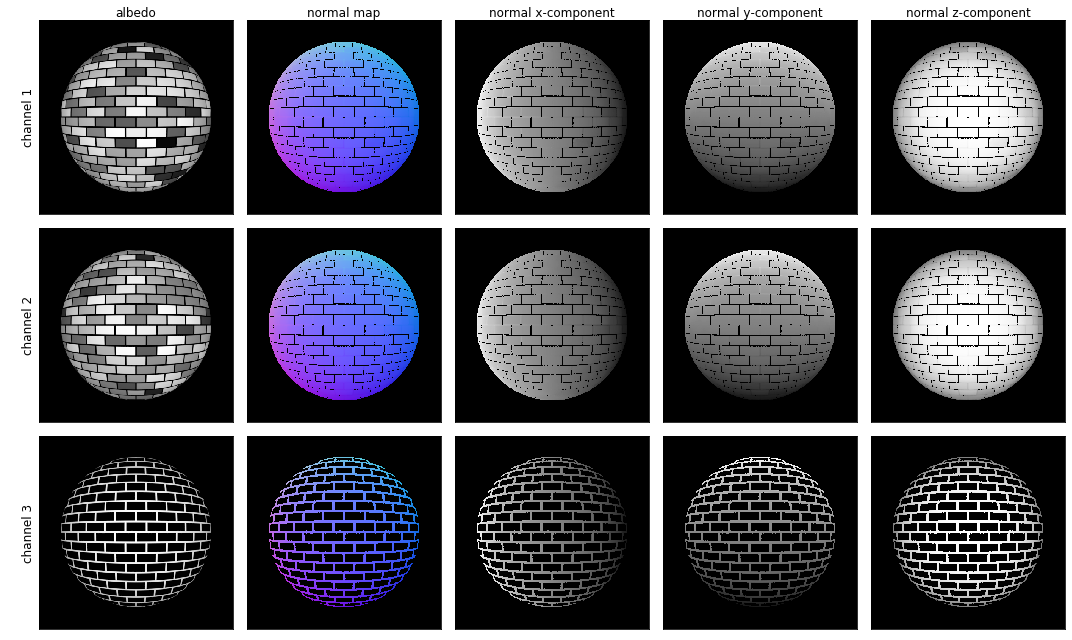

In [140]:
# computing albedo and normals

albedo, normals, _ = estimate_alb_norm(image_stack, scriptV)
show_results(albedo, normals, fig_size=3)

In [141]:
# checking integrability

p, q, SE = check_integrability(normals, threshold=0.005, nan_to_zero=True)
SE = np.nan_to_num(SE)

threshold:  0.005
----------------------------------------
number of outliers in channel 1:  14513
percentage of outliers in channel 1:  5.5%
----------------------------------------
number of outliers in channel 2:  14175
percentage of outliers in channel 2:  5.4%
----------------------------------------
number of outliers in channel 3:  17013
percentage of outliers in channel 3:  6.5%
----------------------------------------
elapsed time: 0.22 s


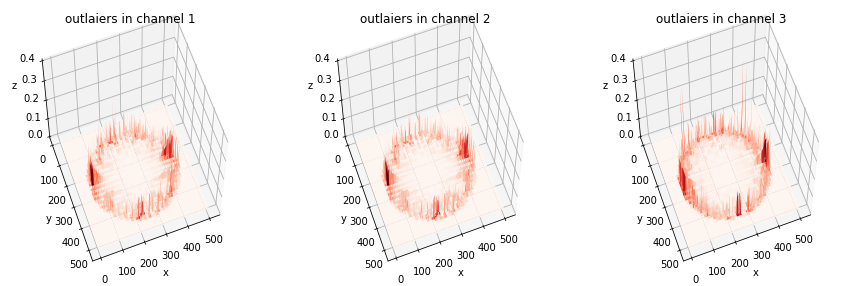

In [142]:
show_outlaiers(SE)

In [153]:
# uncomment this line for inline display mode
%matplotlib inline

# uncomment these lines for interactive display mode
#plt.close('all')
#%matplotlib

integration in column-major order...
elapsed time: 0.03 s
integration in row-major order...
elapsed time: 0.05 s
averaging...
elapsed time: 0.09 s


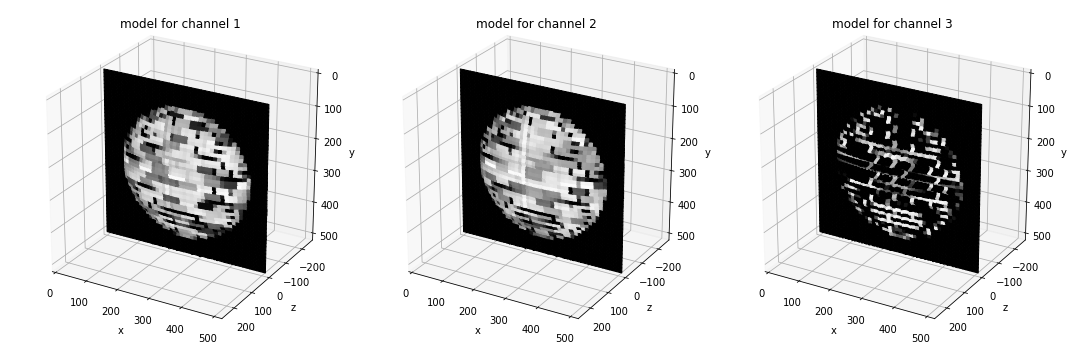

In [156]:
# constructing the surface

height_map = construct_surface(p, q, path_type='average')
show_model(height_map, albedo, fig_size=5)

In [136]:
# averaging the image pixels along the channel axis

image_stack = image_stack.mean(axis=3, keepdims=True)

In [ ]:
# computing albedo and normals and checking integrability for new grayscale images

albedo, normals, _ = estimate_alb_norm(image_stack, scriptV)
p, q, SE = check_integrability(normals, nan_to_zero=True)

computing albedo and normals without shadow trick...finished!
elapsed time: 0.73 s
threshold:  0.005
----------------------------------------
number of outliers in channel 1:  1623
percentage of outliers in channel 1:  0.6%
----------------------------------------
elapsed time: 0.04 s
integration in column-major order...
elapsed time: 0.01 s
integration in row-major order...
elapsed time: 0.02 s
averaging...
elapsed time: 0.04 s


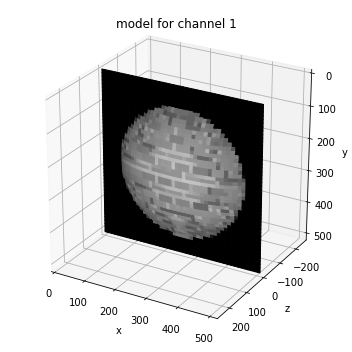

In [137]:
# constructing the surface

fig_size = 5
fig = plt.figure(figsize=(fig_size*3, fig_size), tight_layout=True);

height_map_col = construct_surface(p, q, path_type='column')

ax = fig.add_subplot(1, 3, 1, projection='3d');
show_model(height_map_col, albedo, fig_size=5, axes=ax);
ax.set(title = 'column-major integration');

print('-'*40)

height_map_row = construct_surface(p, q, path_type='row')

ax = fig.add_subplot(1, 3, 2, projection='3d');
show_model(height_map_row, albedo, fig_size=5, axes=ax);
ax.set(title = 'row-major integration');

print('-'*40)

height_map = construct_surface(p, q, path_type='average')

ax = fig.add_subplot(1, 3, 3, projection='3d');
show_model(height_map, albedo, fig_size=5, axes=ax);
ax.set(title = 'average integration');

In [17]:
# freeing up some memory

del image_stack, scriptV

loading images...finished!
number of images:   121
image size:         (512, 512)
number of channels: 3
elapsed time: 6.54 s


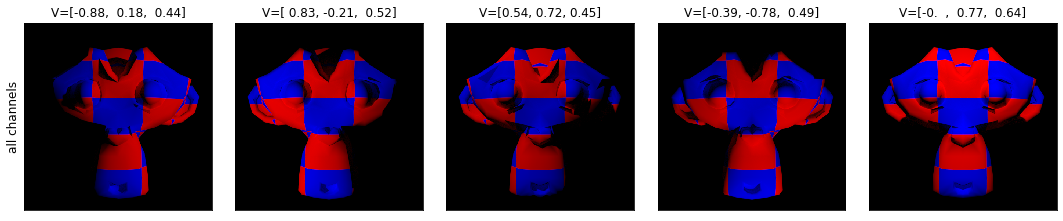

In [4]:
# loading three channels of color images and displaying some samples

image_dir = '../photometrics_images/MonkeyColor'
image_stack, scriptV = load_syn_images(image_dir, channels=(0, 1, 2))
show_samples(image_stack, scriptV, n_samples=5, fig_size=3)

computing albedo and normals without shadow trick...finished!
elapsed time: 68.62 s


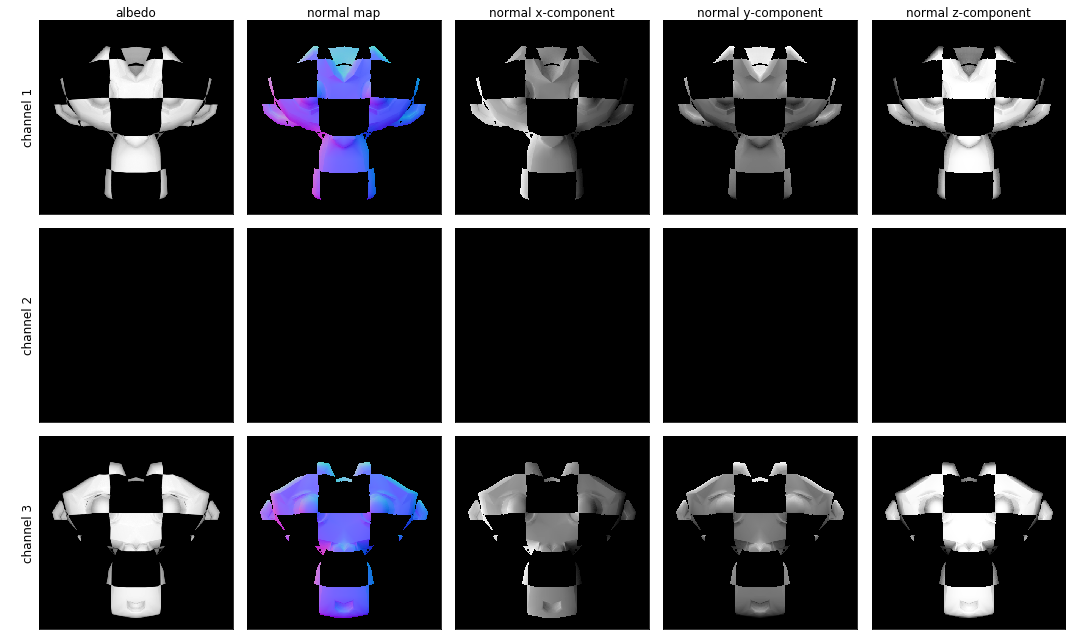

In [5]:
# computing albedo and normals

albedo, normals, _ = estimate_alb_norm(image_stack, scriptV)
show_results(albedo, normals, fig_size=3)

In [8]:
# checking integrability

p, q, SE = check_integrability(normals, nan_to_zero=True)
SE = np.nan_to_num(SE)

threshold:  0.005
----------------------------------------
number of outliers in channel 1:  4868
percentage of outliers in channel 1:  1.9%
----------------------------------------
number of outliers in channel 2:  0
percentage of outliers in channel 2:  0.0%
----------------------------------------
number of outliers in channel 3:  4248
percentage of outliers in channel 3:  1.6%
----------------------------------------
elapsed time: 0.23 s


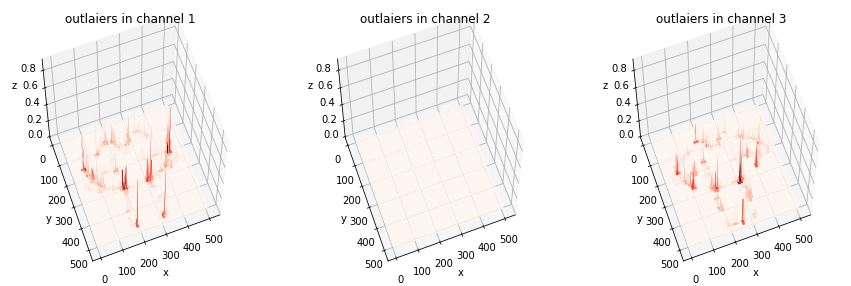

In [9]:
show_outlaiers(SE)

In [ ]:
# uncomment this line for inline display mode
%matplotlib inline

# uncomment these lines for interactive display mode
#plt.close('all')
#%matplotlib

integration in column-major order...
elapsed time: 0.04 s
integration in row-major order...
elapsed time: 0.10 s
averaging...
elapsed time: 0.16 s


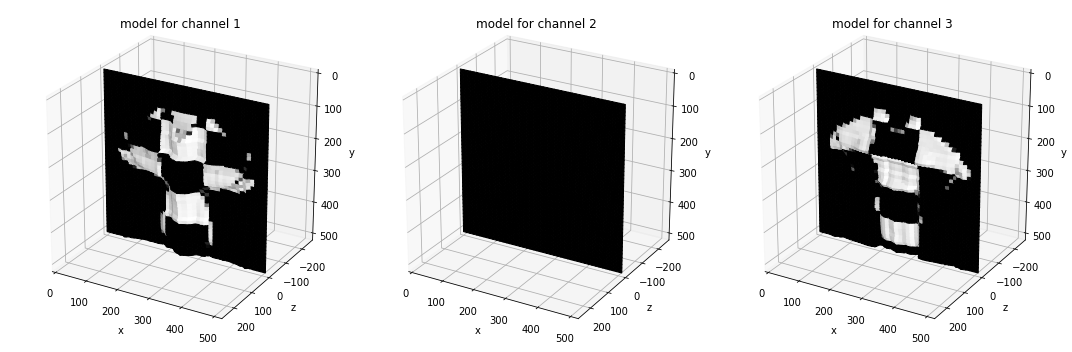

In [10]:
# constructing the surface

height_map = construct_surface(p, q, path_type='average')
show_model(height_map, albedo, fig_size=5)

In [18]:
# loading just channel 0 (Red) and 2 (Blue)

image_stack, scriptV = load_syn_images(image_dir, channels=(0, 2))

loading images...finished!
number of images:   121
image size:         (512, 512)
number of channels: 2
elapsed time: 5.88 s


In [19]:
# averaging the image pixels along the channel axis

image_stack = image_stack.mean(axis=3, keepdims=True)

In [24]:
# computing albedo and normals and checking integrability for new grayscale images

albedo, normals, _ = estimate_alb_norm(image_stack, scriptV)
p, q, SE = check_integrability(normals, nan_to_zero=True)

computing albedo and normals without shadow trick...finished!
elapsed time: 1.58 s
threshold:  0.005
----------------------------------------
number of outliers in channel 1:  3521
percentage of outliers in channel 1:  1.3%
----------------------------------------
elapsed time: 0.03 s


integration in column-major order...
elapsed time: 0.03 s
----------------------------------------
integration in row-major order...
elapsed time: 0.01 s
----------------------------------------
integration in column-major order...
elapsed time: 0.01 s
integration in row-major order...
elapsed time: 0.02 s
averaging...
elapsed time: 0.03 s


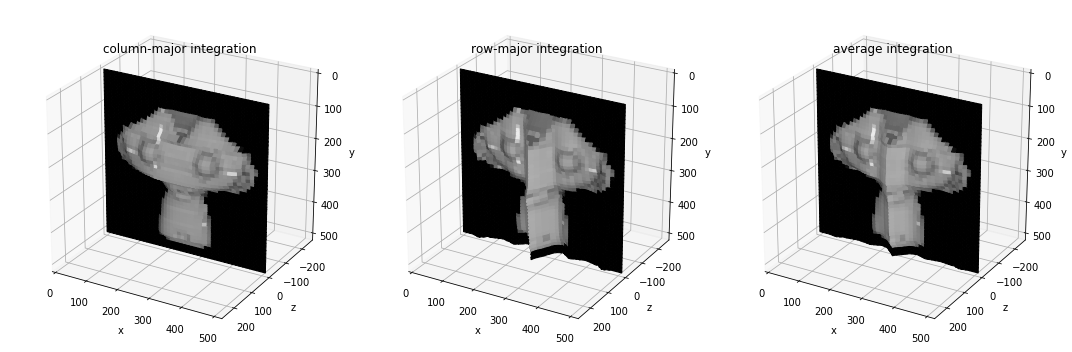

In [25]:
# constructing the surface 

fig_size = 5
fig = plt.figure(figsize=(fig_size*3, fig_size), tight_layout=True);

height_map_col = construct_surface(p, q, path_type='column')

ax = fig.add_subplot(1, 3, 1, projection='3d');
show_model(height_map_col, albedo, fig_size=5, axes=ax);
ax.set(title = 'column-major integration');

print('-'*40)

height_map_row = construct_surface(p, q, path_type='row')

ax = fig.add_subplot(1, 3, 2, projection='3d');
show_model(height_map_row, albedo, fig_size=5, axes=ax);
ax.set(title = 'row-major integration');

print('-'*40)

height_map = construct_surface(p, q, path_type='average')

ax = fig.add_subplot(1, 3, 3, projection='3d');
show_model(height_map, albedo, fig_size=5, axes=ax);
ax.set(title = 'average integration');

### Question - 6
Run the algorithm for the `Yale Face` images (included in the lab material). Observe and discuss the results for different integration paths. Discuss how the images violate the assumptions of the shape-from-shading methods. Remember to include specific input images to illustrate your points. How the results would improve when the problematic images are all removed? Show the results in your report.

$\color{blue}{\textit Answer:}$
_Specular reflections, especially on the nose and eyes shows that the face surface obviously violates the Lambertian reflection assumption. Moreover, Ambient illumination and shadows violate the local shading model assumption. Furthermore, there are some noisy sample images that violate the distance point source assumption._

_Secularities on the eyes and nose accumulate error along the column axis when using row-major integration._

_Removing images with large casted shadows (based on images' average value) slightly improve the general result but magnifies the eyes specularity errors_

In [106]:
del image_stack, scriptV

In [107]:
# loading the face images

image_dir = '../photometrics_images/yaleB02'
image_stack, scriptV = load_face_images(image_dir)

loading images...finished!
number of images:   64
image size:         (192, 168)
number of channels: 1
elapsed time: 0.87 s


In [108]:
#show_samples(image_stack, scriptV, n_samples=5, fig_size=3)

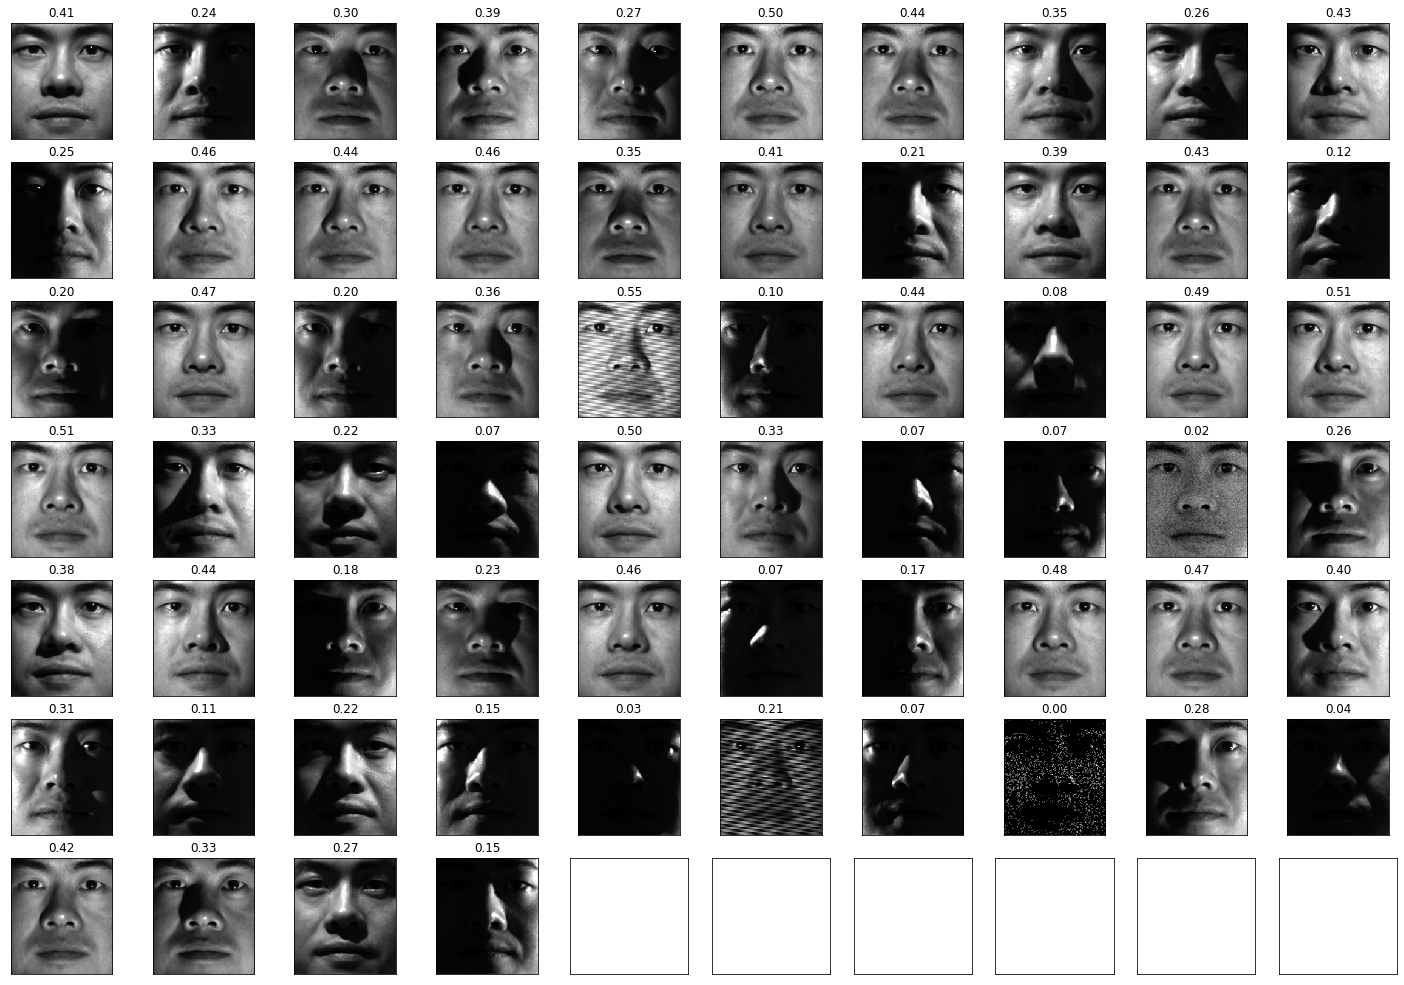

In [156]:
# displaying all the images with their mean value

show_samples_grid(image_stack, n_columns=10, fig_size=2.5)

In [138]:
# computing the albedo and normals

albedo, normals, _ = estimate_alb_norm(image_stack, scriptV)

computing albedo and normals without shadow trick...finished!
elapsed time: 0.12 s


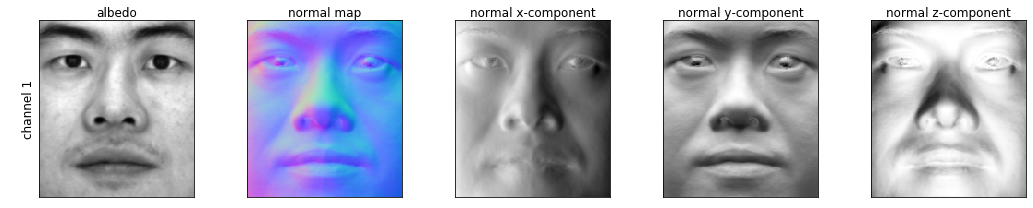

In [139]:
show_results(albedo, normals, fig_size=3, nan_to_zero=True)

In [140]:
# checking integrability

p, q, SE = check_integrability(normals, nan_to_zero=True)
SE = np.nan_to_num(SE, nan=0.0)

threshold:  0.005
----------------------------------------
number of outliers in channel 1:  809
percentage of outliers in channel 1:  2.5%
----------------------------------------
elapsed time: 0.02 s


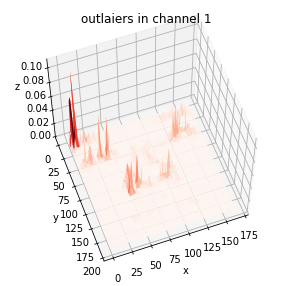

In [141]:
show_outlaiers(SE)

In [ ]:
# uncomment this line for inline display mode
%matplotlib inline

# uncomment these lines for interactive display mode
#plt.close('all')
#%matplotlib

integration in column-major order...
elapsed time: 0.00 s
----------------------------------------
integration in row-major order...
elapsed time: 0.00 s
----------------------------------------
integration in column-major order...
elapsed time: 0.00 s
integration in row-major order...
elapsed time: 0.00 s
averaging...
elapsed time: 0.00 s


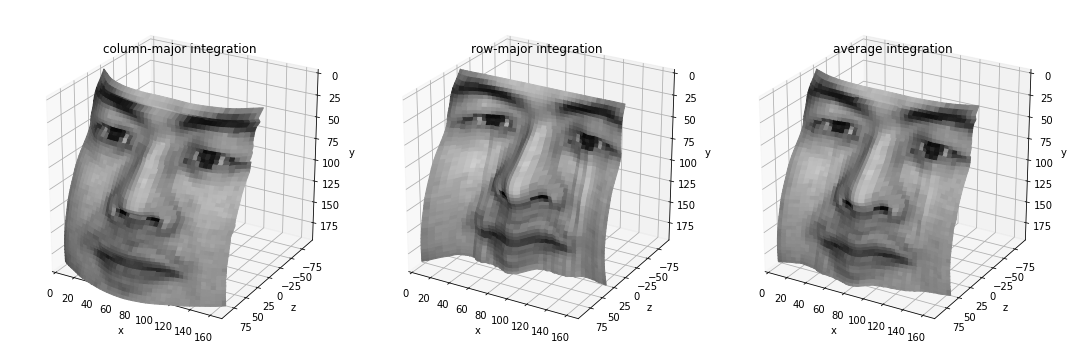

In [142]:
# constructing the surface

fig_size = 5
fig = plt.figure(figsize=(fig_size*3, fig_size), tight_layout=True);

height_map_col = construct_surface(p, q, path_type='column')

ax = fig.add_subplot(1, 3, 1, projection='3d');
show_model(height_map_col, albedo, fig_size=5, axes=ax);
ax.set(title = 'column-major integration');

print('-'*40)

height_map_row = construct_surface(p, q, path_type='row')

ax = fig.add_subplot(1, 3, 2, projection='3d');
show_model(height_map_row, albedo, fig_size=5, axes=ax);
ax.set(title = 'row-major integration');

print('-'*40)

height_map = construct_surface(p, q, path_type='average')

ax = fig.add_subplot(1, 3, 3, projection='3d');
show_model(height_map, albedo, fig_size=5, axes=ax);
ax.set(title = 'average integration');

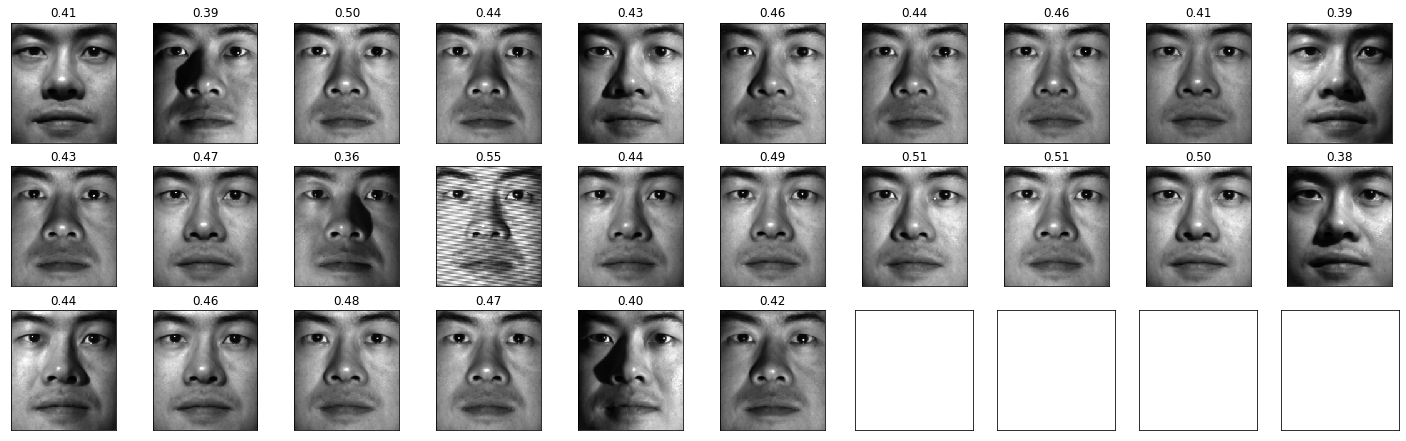

In [158]:
# removing problematic images (images with large casted shadow, measured based on avergae value)

a = image_stack.mean(axis=(0, 1, 3)) > 0.35
image_stack_new = image_stack[:,:,a,:]
scriptV_new = scriptV[a, :]
image_stack_new.shape, scriptV_new.shape

show_samples_grid(image_stack_new, n_columns=10, fig_size=2.5)

In [159]:
# computing the albedo and normals for filtered images

albedo, normals, _ = estimate_alb_norm(image_stack_new, scriptV_new)

computing albedo and normals without shadow trick...finished!
elapsed time: 0.10 s


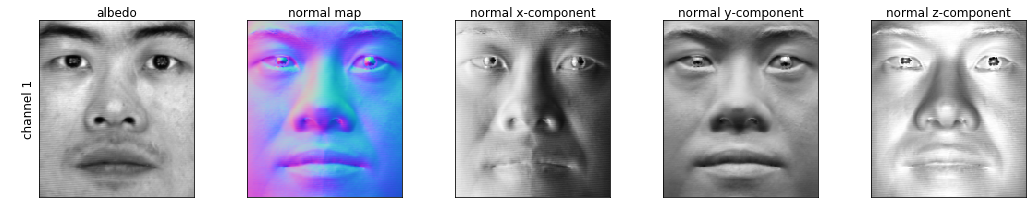

In [160]:
show_results(albedo, normals, fig_size=3, nan_to_zero=True)

In [161]:
# checking integrability

p, q, SE = check_integrability(normals, nan_to_zero=True)
SE = np.nan_to_num(SE, nan=0.0)

threshold:  0.005
----------------------------------------
number of outliers in channel 1:  2618
percentage of outliers in channel 1:  8.1%
----------------------------------------
elapsed time: 0.01 s


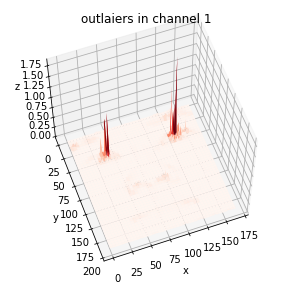

In [162]:
show_outlaiers(SE)

integration in column-major order...
elapsed time: 0.00 s
----------------------------------------
integration in row-major order...
elapsed time: 0.00 s
----------------------------------------
integration in column-major order...
elapsed time: 0.00 s
integration in row-major order...
elapsed time: 0.00 s
averaging...
elapsed time: 0.00 s


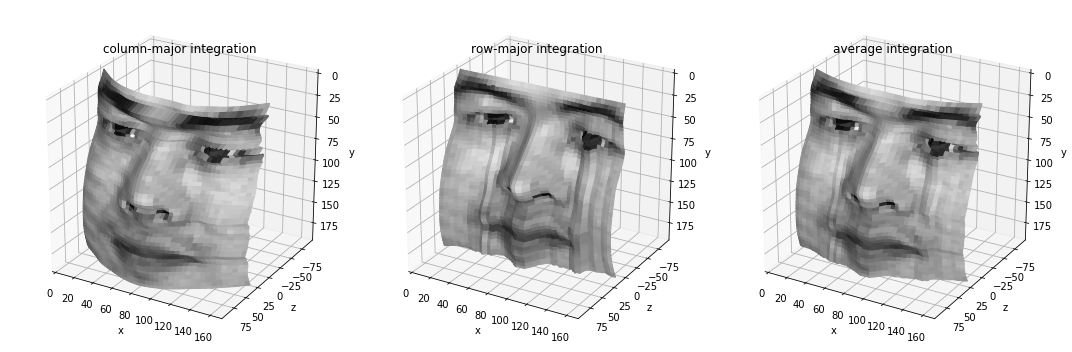

In [163]:
# constructing the surface

fig_size = 5
fig = plt.figure(figsize=(fig_size*3, fig_size), tight_layout=True);

height_map_col = construct_surface(p, q, path_type='column')

ax = fig.add_subplot(1, 3, 1, projection='3d');
show_model(height_map_col, albedo, fig_size=5, axes=ax);
ax.set(title = 'column-major integration');

print('-'*40)

height_map_row = construct_surface(p, q, path_type='row')

ax = fig.add_subplot(1, 3, 2, projection='3d');
show_model(height_map_row, albedo, fig_size=5, axes=ax);
ax.set(title = 'row-major integration');

print('-'*40)

height_map = construct_surface(p, q, path_type='average')

ax = fig.add_subplot(1, 3, 3, projection='3d');
show_model(height_map, albedo, fig_size=5, axes=ax);
ax.set(title = 'average integration');